In [1]:
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
for n in inspector.get_columns('measurement'):
    print(n['name'])

id
station
date
prcp
tobs


In [12]:
for n in inspector.get_columns('station'):
    print(n['name'])

id
station
name
latitude
longitude
elevation


# Exploratory Climate Analysis

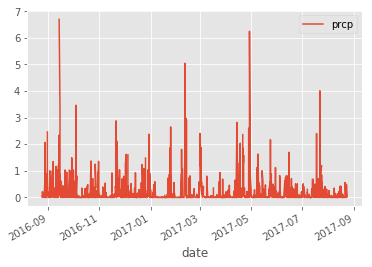

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date = dt.datetime(2017,8,23)


# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.datetime(2017,8,23) - dt.timedelta(weeks = 52)
# Perform a query to retrieve the data and precipitation scores

precip_data = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all())
# Save the query results as a Pandas DataFrame and set the index to the date column


precip_data.date = pd.to_datetime(precip_data.date)

# Sort the dataframe by date
precip_data = precip_data.set_index('date')
# Use Pandas Plotting with Matplotlib to plot the data
precip_data.plot()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
full_precip = pd.DataFrame(session.query(Measurement.prcp).all())

In [15]:
precip_data.describe()

,prcp
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()

9

In [17]:
#execute SQL query and convert to a DataFrame
joined_df = pd.DataFrame(session.query(
    Measurement.station,
    Station.name,
    Measurement.date,
    Measurement.prcp,
    Measurement.tobs).outerjoin(Station,Measurement.station == Station.station).all())

#convert date column to datetime
joined_df.date = pd.to_datetime(joined_df.date)

#index the DataFrame by the date column
joined_df = joined_df.set_index('date')

In [18]:
#Station counts by temperature observations
joined_df.pivot_table(values = 'tobs', index = ['station','name'], aggfunc = 'count').sort_values(by = 'tobs', ascending = False)

,,tobs
station,name,
USC00519281,"WAIHEE 837.5, HI US",2772
USC00519397,"WAIKIKI 717.2, HI US",2724
USC00513117,"KANEOHE 838.1, HI US",2709
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
USC00517948,"PEARL CITY, HI US",1372
USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [19]:
#Station counts by precip observations
joined_df.pivot_table(values = 'prcp', index = ['station','name'], aggfunc = 'count').sort_values(by = 'prcp', ascending = False)

,,prcp
station,name,
USC00519281,"WAIHEE 837.5, HI US",2772
USC00513117,"KANEOHE 838.1, HI US",2696
USC00519397,"WAIKIKI 717.2, HI US",2685
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2572
USC00516128,"MANOA LYON ARBO 785.2, HI US",2484
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1937
USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1932
USC00517948,"PEARL CITY, HI US",683
USC00518838,"UPPER WAHIAWA 874.3, HI US",342


In [20]:
joined_df.pivot_table(values = ['tobs','prcp'], index = ['station','name'], aggfunc = ['count','mean','min','max'])

count            mean  \
                                                    prcp  tobs      prcp   
station     name                                                           
USC00511918 HONOLULU OBSERVATORY 702.2, HI US       1932  1979  0.047971   
USC00513117 KANEOHE 838.1, HI US                    2696  2709  0.141921   
USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US  1937  2202  0.121058   
USC00516128 MANOA LYON ARBO 785.2, HI US            2484  2612  0.429988   
USC00517948 PEARL CITY, HI US                        683  1372  0.063602   
USC00518838 UPPER WAHIAWA 874.3, HI US               342   511  0.207222   
USC00519281 WAIHEE 837.5, HI US                     2772  2772  0.212352   
USC00519397 WAIKIKI 717.2, HI US                    2685  2724  0.049020   
USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US      2572  2669  0.114961   

                                                               min        \
                                                         tobs prcp  tobs   
station     name                                                           
USC00511918 HONOLULU OBSERVATORY 702.2, HI US       71.615968  0.0  53.0   
USC00513117 KANEOHE 838.1, HI US                    72.689184  0.0  59.0   
USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US  74.873297  0.0  58.0   
USC00516128 MANOA LYON ARBO 785.2, HI US            70.915008  0.0  58.0   
USC00517948 PEARL CITY, HI US                       74.684402  0.0  58.0   
USC00518838 UPPER WAHIAWA 874.3, HI US              72.724070  0.0  58.0   
USC00519281 WAIHEE 837.5, HI US                     71.663781  0.0  54.0   
USC00519397 WAIKIKI 717.2, HI US                    74.553231  0.0  56.0   
USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US      74.543649  0.0  56.0   

                                                      max        
                                                     prcp  tobs  
station     name                                                 
USC00511918 HONOLULU OBSERVATORY 702.2, HI US        4.00  87.0  
USC00513117 KANEOHE 838.1, HI US                     7.65  85.0  
USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US  11.53  85.0  
USC00516128 MANOA LYON ARBO 785.2, HI US             8.06  84.0  
USC00517948 PEARL CITY, HI US                        2.80  87.0  
USC00518838 UPPER WAHIAWA 874.3, HI US               6.30  83.0  
USC00519281 WAIHEE 837.5, HI US                      9.64  85.0  
USC00519397 WAIKIKI 717.2, HI US                     4.20  87.0  
USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US       6.38  85.0

In [21]:
joined_df.pivot_table(values = 'tobs', index = ['station','name'], aggfunc = ['mean','min','max','count'])

,,mean,min,max,count
,,tobs,tobs,tobs,tobs
station,name,,,,
USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",71.615968,53.0,87.0,1979
USC00513117,"KANEOHE 838.1, HI US",72.689184,59.0,85.0,2709
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",74.873297,58.0,85.0,2202
USC00516128,"MANOA LYON ARBO 785.2, HI US",70.915008,58.0,84.0,2612
USC00517948,"PEARL CITY, HI US",74.684402,58.0,87.0,1372
USC00518838,"UPPER WAHIAWA 874.3, HI US",72.724070,58.0,83.0,511
USC00519281,"WAIHEE 837.5, HI US",71.663781,54.0,85.0,2772
USC00519397,"WAIKIKI 717.2, HI US",74.553231,56.0,87.0,2724


In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_temp_pull = pd.DataFrame(session.query(
    Measurement.date,
    Measurement.tobs).filter(Measurement.date >= year_ago).filter(Measurement.station == 'USC00519281').all())

station_temp_pull.date = pd.to_datetime(station_temp_pull.date)

station_temp_pull = station_temp_pull.set_index('date')



# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


Text(0.5,0,'Temperature')

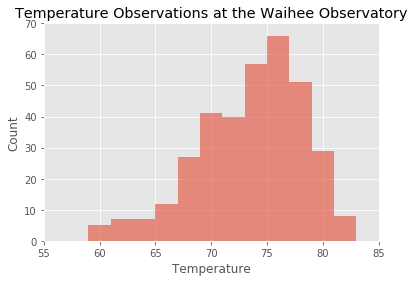

In [23]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(station_temp_pull.tobs, alpha = 0.6, bins = 12)
plt.ylim(0,70)
plt.xlim(55,85)
plt.title('Temperature Observations at the Waihee Observatory')
plt.ylabel('Count')
plt.xlabel('Temperature')


C:\Users\Eric\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


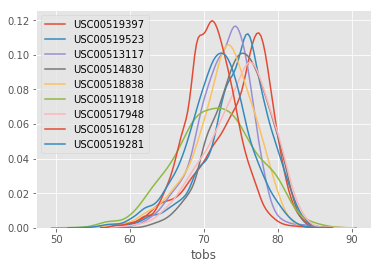

In [24]:
for _ in set(joined_df.station):
    sns.distplot(joined_df['tobs'][joined_df.station == _], hist = False, label = _)

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [28]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [30]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [31]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [32]:
# Plot the daily normals as an area plot with `stacked=False`


In [65]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    start_end_query = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    start_end_dict = {
        'Min' : start_end_query[0][0],
        'Average' : start_end_query[0][1],
        'Max' : start_end_query[0][2]
    }
    return start_end_dict
    #return start_end_query
    #start_end_dict = {}
    #start_end_dict.update(start_end_query)
    #return start_end_dict
    
    #return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        #filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [58]:
start_end_dict = {}

In [66]:
calc_temps('2012-02-28', '2012-03-05')

{'Min': 62.0, 'Average': 69.57142857142857, 'Max': 74.0}

In [60]:
start_end_dict = {
    'Min' : calc_temps('2012-02-28', '2012-03-05')[0][0],
    'Average' : calc_temps('2012-02-28', '2012-03-05')[0][1],
    'Max' : calc_temps('2012-02-28', '2012-03-05')[0][2]
}

In [52]:
start_end_dict

{'Min': 62.0, 'Average': 69.57142857142857, 'Max': 74.0}

In [67]:
def calc_start_end_tobs(start, end):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    start_end_query = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    start_end_dict = {
        'Min' : start_end_query[0][0],
        'Average' : start_end_query[0][1],
        'Max' : start_end_query[0][2]
    }
    return start_end_dict

In [69]:
calc_start_end_tobs('2012-02-28', '2012-03-05')

{'Min': 62.0, 'Average': 69.57142857142857, 'Max': 74.0}